# NFL Game Outcome Prediction
This project aims to predict the outcomes (win/loss) of NFL games using a Random Forest model. 
Key features include rushing attempts, passing attempts, sacks allowed, and other game statistics. 
The dataset is sourced from NFL FastR, and this notebook details the data preprocessing, model training, and evaluation.


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## Data Collection and Description
The dataset used for this project is fetched from NFL FastR. It includes game-level statistics for NFL teams, 
such as rushing yards, passing yards, sacks allowed, and points scored.


In [6]:
# Load the dataset
data = pd.read_csv('team_game_stats.csv')  # Replace with your dataset file path
data.head()

,game_id,rush_attempt,pass_attempt,sack,passing_yards,rushing_yards,home_team,away_team,total_home_score,total_away_score,is_home_team,win
0,2024_01_ARI_BUF,26.0,35.0,4.0,162.0,124.0,BUF,ARI,34,28,False,0
1,2024_01_ARI_BUF,33.0,25.0,2.0,232.0,130.0,BUF,ARI,34,28,True,1
2,2024_01_BAL_KC,32.0,42.0,1.0,273.0,185.0,KC,BAL,27,20,False,0
3,2024_01_BAL_KC,20.0,30.0,2.0,291.0,72.0,KC,BAL,27,20,True,1
4,2024_01_CAR_NO,20.0,35.0,4.0,161.0,58.0,NO,CAR,47,10,False,0


## Data Preprocessing
### Steps:
1. Handle missing values.
2. Select relevant features for the model.
3. Create a target variable: Win (1) / Loss (0).
4. Split the data into training and testing sets.


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Define features and target
features = ['rush_attempt', 'pass_attempt', 'sack', 'passing_yards', 'rushing_yards']
X = data[features]
y = data['win']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7910447761194029
Confusion Matrix:
 [[23  6]
 [ 8 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.83      0.79      0.81        38

    accuracy                           0.79        67
   macro avg       0.79      0.79      0.79        67
weighted avg       0.79      0.79      0.79        67



## Step 5: Model Evaluation

In this step, we evaluate the performance of the Random Forest model and analyze the importance of each feature.

### Metrics Evaluated:
1. **Accuracy:** Percentage of correct predictions.
2. **Confusion Matrix:** Breakdown of true/false positives and negatives.
3. **Classification Report:** Precision, recall, and F1-score for each class (win or loss).

### Feature Importance:
We analyze the contribution of each feature to the predictions using the model's feature importance scores.


Accuracy: 0.7910447761194029
Confusion Matrix:
 [[23  6]
 [ 8 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.83      0.79      0.81        38

    accuracy                           0.79        67
   macro avg       0.79      0.79      0.79        67
weighted avg       0.79      0.79      0.79        67



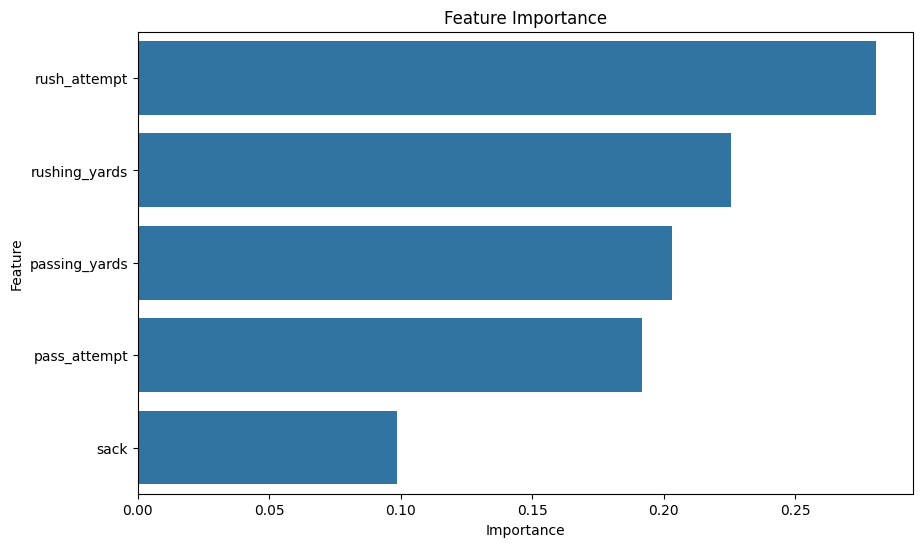

In [9]:
# Evaluate the model performance (this can be reused from Step 4)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze and visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
